In [7]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from skimage.io import imread
from skimage.transform import rotate
from im_rotate import im_rotate
from scipy import ndimage, datasets
import scipy.optimize as optimize
from caracNL_BG import caracNL_BG
from identification_modele import identification_modele

In [2]:
# Metre le fichier . mat en .txt 

dossier = 'MAD Statique/mes_2024.03.22'

# surf_c = np.loadtxt(dossier + '/A1.txt')
               
# Lecture du fichier MATLAB (.m) et écriture dans un fichier texte (.txt)
with open(dossier + '/A1.mat', 'r') as file:
    matlab_code = file.read()
    
# Écriture du contenu dans un fichier texte
with open(dossier + '/A1.txt', 'w') as file:
    file.write(matlab_code)
    
print("Conversion terminée. Le fichier MATLAB a été converti en fichier texte.")

Conversion terminée. Le fichier MATLAB a été converti en fichier texte.


In [3]:
# CA FONCTIONNE
# Ouvrir le fichier d'entrée en mode lecture
with open(dossier + '/A1.txt', 'r') as f:
    lines = f.readlines()

# Initialiser une variable pour suivre le numéro de fichier en cours
current_file_index = 1

# Parcourir les lignes du fichier
for line in lines:
    if line.startswith('#'):
        # Si une ligne commence par '#', cela indique un nouveau fichier
        current_file_index += 1
    else:
        # Écrire le contenu de la ligne dans le fichier correspondant
        with open(dossier + f'/matrix{current_file_index}.txt', 'a') as current_file:
            current_file.write(line)


In [4]:
# def_r 
with open(dossier + '/matrix6.txt', 'r') as f:
    lines = f.readlines()

# Initialiser une variable pour suivre le numéro de fichier en cours
current_file_index = 1
# Parcourir les lignes du fichier
for line in lines:
    # Diviser la ligne en valeurs individuelles en utilisant l'espace comme délimiteur
    values = line.split()
    values = np.array(values)
    # Écrire les valeurs dans le fichier correspondant
    with open(dossier + '/def_r.txt', 'a') as current_file:
        for value in values:
            current_file.write(value + ' ')
        current_file.write('\n')

# der_m
with open(dossier + '/matrix10.txt', 'r') as f:
    lines = f.readlines()
current_file_index = 1
for line in lines:
    values = line.split()
    values = np.array(values)
    with open(dossier + '/def_m.txt', 'a') as current_file:
        for value in values:
            current_file.write(value + ' ')
        current_file.write('\n')
        
# surf_c
with open(dossier + '/matrix14.txt', 'r') as f:
    lines = f.readlines()
current_file_index = 1
for line in lines:
    values = line.split()
    values = np.array(values)
    with open(dossier + '/surf_c.txt', 'a') as current_file:
        for value in values:
            current_file.write(value + ' ')
        current_file.write('\n')

In [9]:
def_r = np.loadtxt(dossier + '/def_r.txt')
def_m = np.loadtxt(dossier + '/def_m.txt')
surf_c = np.loadtxt(dossier + '/surf_c.txt')
F = np.loadtxt(dossier + '/force_A1.txt')

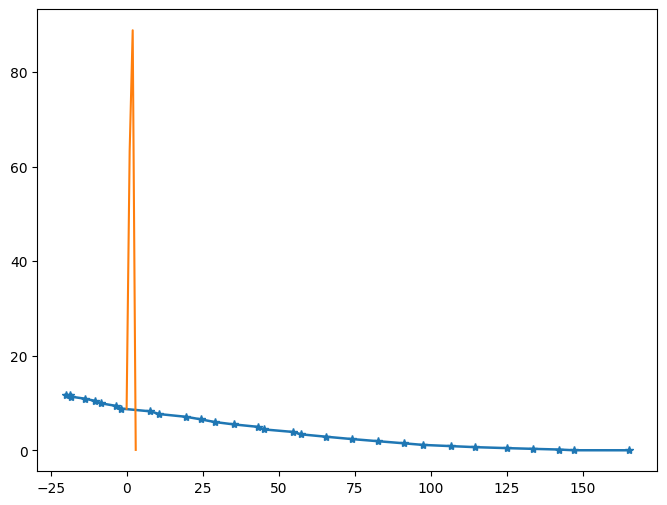

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(F, surf_c, '*-', linewidth=1.8, label='Force 1')
A = identification_modele(F, surf_c)
plt.plot(identification_modele(F, surf_c)[0])
plt.show()

In [6]:
# # tracer la surface du cannal d'anche

# # plt.close('all')

# # plt.figure(figsize=(8, 6))
# # dossier = 'MAD Statique/mes_2024.03.22'
# # pentes = []
# # # surf_c = []
# # # F =[]

# # surf_c = np.loadtxt(dossier + '/A1.txt')
# # F = np.loadtxt(dossier + '/force_A1.txt')
    
 
# # # PlotF
# # plt.plot(F, surf_c, '*-', linewidth=1.8, label='Force 1')
# # plt.xlabel('Force')
# # plt.ylabel('Surface (mm²)')
# # plt.title('Surface du canal d\'anche en fonction de la force \n d\'appui de la lèvre articielle')
# # plt.legend()
# # plt.grid(True)
# # plt.axis([-30, 350, -2, 13])
# # plt.xticks(fontsize=12)
# # plt.yticks(fontsize=12)
# # plt.show()
    
    
# pg = F
# S = surf_c
# print(S)

# # Identification grossière des paramètres pour l'initialisation de l'optimisation
# Smax = np.max(S)
# indmax = np.where(S > 0.5 * Smax)[0]
# P = np.polyfit(pg[indmax], S[indmax], 1)
# Cest = -P[0]  # pente
# S0est = P[1]  # ordonnée à l'origine
# Stheo = np.polyval(P, pg[indmax])


# # Paramètres initiaux de l'optimisation
# PM0 = S0est / Cest
# Sfuites0 = 0
# Coude0 = PM0 / 4
# p0 = [S0est, PM0, Coude0, Sfuites0]

# # Minimisation au sens des moindres carrés
# Paramopt, _ = optimize.leastsq(lambda p: caracNL_BG(p, [pg, S]), p0)
# print(Paramopt)

# pgt = np.linspace(-20, 1000, 100)
# ST = caracNL_BG(pgt, *Paramopt)

# # plt.close('all')
# # Tracé des résultats
# plt.plot(pgt, ST, 'k', linewidth=3)
# plt.plot(0, Paramopt[0], '+r', linewidth=6)
# plt.plot(Paramopt[1], 0, '+r', linewidth=6)
# plt.plot([Paramopt[1], 0], [0, Paramopt[0]], '-.r', linewidth=1)
# plt.plot(Paramopt[1] + Paramopt[2], 0, '+g', linewidth=6)
# plt.plot(Paramopt[1] - Paramopt[2], 0, '+g', linewidth=6)
# plt.plot(0, Paramopt[3], '+b', linewidth=6)
# plt.plot([0, 6], [Paramopt[3], Paramopt[3]], ':b', linewidth=1)
# limit = np.linspace(0, 14, 100)
# plt.plot(np.ones_like(limit) * (Paramopt[1] + Paramopt[2]), limit, '--g', linewidth=1)
# plt.plot(np.ones_like(limit) * (Paramopt[1] - Paramopt[2]), limit, '--g', linewidth=1)

# plt.show()

